In [38]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# mnist data loading
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# mnist data preprocessing
W, H = X_train.shape[1:]
X_train = X_train.reshape(-1,W,H,1)/255.0
X_test = X_test.reshape(-1,W,H,1)/255.0
num_classes = 10
Y_train_ = to_categorical(Y_train, num_classes)
Y_test_ = to_categorical(Y_test, num_classes)

# mnist model definition
input_shape = [W, H, 1]

In [40]:
def build_model1():
    model = models.Sequential()
    # 1st Conv layer
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # 2nd Conv layer
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    # max-pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # Fully connected MLP
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    # compile
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def build_model2():
    model = models.Sequential()
    # 1st Conv layer
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # max-pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # Fully connected MLP
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    # compile
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def build_model3():
    model = models.Sequential()
    # 1st Conv layer
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # 2nd Conv layer
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    # max-pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # Fully connected MLP
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    # compile
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def build_model4():
    model = models.Sequential()
    # 1st Conv layer
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # max-pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # 2nd Conv layer
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    # max-pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # Fully connected MLP
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    # compile
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def build_model5():
    model = models.Sequential()
    # 1st Conv layer
    model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # 2nd Conv layer
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    # max-pooling layer
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # Fully connected MLP
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    # compile
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


# Plotting func
def plot_acc(h, title='accuracy'):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

def plot_loss(h, title='loss'):
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

In [41]:
# main loop w/o CV
import time
starttime = time.time()
num_epochs = 20

# model build
model = build_model5()

history = model.fit(X_train, Y_train_, validation_split=0.2, epochs = num_epochs, 
                    batch_size = 100, verbose=1)
train_loss, train_acc = model.evaluate(X_train, Y_train_)
test_loss, test_acc = model.evaluate(X_test, Y_test_)
print('train_acc=', train_acc)
print('test_acc=', test_acc)
print('elapsed time=', time.time()-starttime)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 4608)              0         
                                                                 
 dense_16 (Dense)            (None, 256)               1179904   
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                      

2023-04-24 15:31:05.202704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


479/480 [============================>.] - ETA: 0s - loss: 0.1646 - accuracy: 0.9486

2023-04-24 15:31:12.226793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - 8s 16ms/step - loss: 0.1643 - accuracy: 0.9487 - val_loss: 0.0623 - val_accuracy: 0.9821
Epoch 2/20
480/480 [==============================] - 8s 16ms/step - loss: 0.0446 - accuracy: 0.9868 - val_loss: 0.0499 - val_accuracy: 0.9854
Epoch 3/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0444 - val_accuracy: 0.9872
Epoch 4/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0407 - val_accuracy: 0.9893
Epoch 5/20
480/480 [==============================] - 7s 16ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0475 - val_accuracy: 0.9890
Epoch 6/20
480/480 [==============================] - 8s 16ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 0.0482 - val_accuracy: 0.9894
Epoch 7/20
480/480 [==============================] - 7s 15ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0593 - val_accuracy: 0.9883
Epoch 8/20

2023-04-24 15:33:35.125598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step - loss: 0.0994 - accuracy: 0.9906
train_acc= 0.9978833198547363
test_acc= 0.9905999898910522
elapsed time= 169.81167817115784


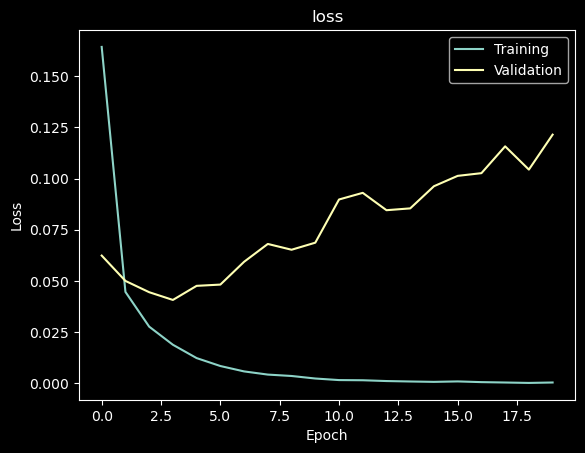

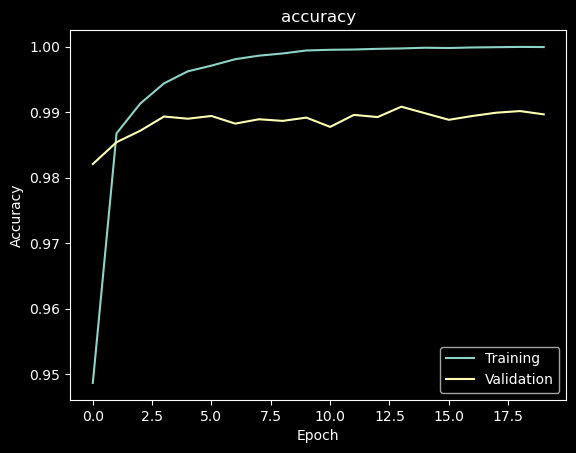

In [42]:
plot_loss(history)
plt.show()
plot_acc(history)
plt.show()